In [19]:
import json
from pathlib import Path

import pandas as pd

json_paths = list()
stat_dicts = []
for path in Path('../output').rglob('processor_stats.json'):
    dir_name = str(path.parent)
    with open(path, 'r') as file:
        stats = json.loads(file.read())
        
    for param in dir_name.split('_'):
        if '=' not in param:
            continue
        x, y = param.split('=')
        stats[x] = float(y)
    stats['name'] = dir_name
    stat_dicts.append(stats)
stat_dicts[0].keys(), len(stat_dicts)

(dict_keys(['pruned tree size (#nodes)', 'pruned tree height', 'pruned tree depth', '# marked nodes', 'attached tree size (#nodes)', '# unmoved subtrees', '% unmoved subtrees', 'N', 'e1', 'e2', 'a', 'b', 'c', 'name']),
 9)

In [20]:
ablated_data = []
for stats in stat_dicts:
    if (stats['a'] + stats['b'] + stats['c']) == 1:
        ablated_data.append(stats)
        
len(ablated_data)

3

22181 22181
130932 130932
196792 196792


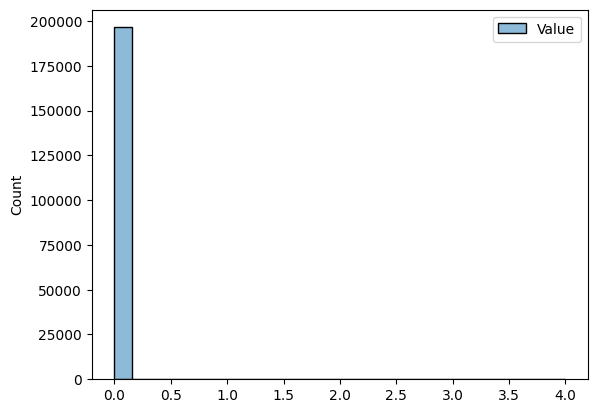

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
def histogram(stat: str):
    epsilon_1 = 1.0
    data = [data for data in ablated_data if data['e1'] == epsilon_1]
    values, labels = [], []
    for d in data:
        stat_list = d[stat]
        values.extend(stat_list)
        labels.extend([d['name']] * len(stat_list))
        print(len(values), len(labels))
    df = pd.DataFrame({
        'Value': values,
        'Labels': labels
    })
    
    sns.histplot(
        data = df,
        bins=25,
    )
    
histogram('pruned tree height')
